In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from deeplearning2020 import helpers

In [2]:
data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
total_classes = 10
train_vec_labels = keras.utils.to_categorical(train_labels, total_classes)
test_vec_labels = keras.utils.to_categorical(test_labels, total_classes)

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(10, activation='sigmoid')
])

In [6]:
#sgd = keras.optimizers.SGD(lr=0.04, decay=1e-7, momentum=0.9, nesterov=True)
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='huber_loss',
    metrics=['acc', 'mse', 'mae', 'mape'])

In [7]:
history = model.fit(train_images, train_vec_labels, epochs=12, verbose=True, validation_data=(test_images, test_vec_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0149 - acc: 0.7992 - mse: 0.0297 - mae: 0.0619 - mape: 31775458.0000 - val_loss: 0.0135 - val_acc: 0.8138 - val_mse: 0.0270 - val_mae: 0.0507 - val_mape: 25654186.0000
Epoch 2/12
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0104 - acc: 0.8627 - mse: 0.0207 - mae: 0.0432 - mape: 21849280.0000 - val_loss: 0.0104 - val_acc: 0.8613 - val_mse: 0.0208 - val_mae: 0.0431 - val_mape: 22207610.0000
Epoch 3/12
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0094 - acc: 0.8758 - mse: 0.0187 - mae: 0.0380 - mape: 18909652.0000 - val_loss: 0.0100 - val_acc: 0.8675 - val_mse: 0.0200 - val_mae: 0.0394 - val_mape: 20604166.0000
Epoch 4/12
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0088 - acc: 0.8834 - mse: 0.0176 - mae: 0.0354 - mape: 17580000.0000 - val_loss: 0.0095 - val_acc: 0.8745 - val_ms

In [8]:
eval_loss, eval_acc, eval_mse, eval_mae, eval_mape = model.evaluate(test_images, test_vec_labels, verbose=True)
print("Model accuracy: %.2f" % eval_acc)

10000/10000 [==============================] - 0s 23us/sample - loss: 0.0088 - acc: 0.8841 - mse: 0.0176 - mae: 0.0305 - mape: 14340542.0000
Model accuracy: 0.88


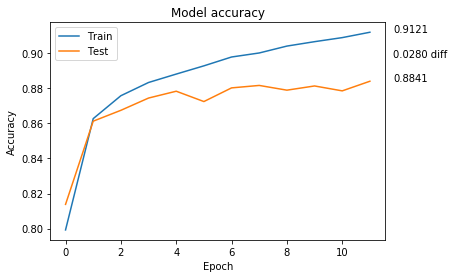

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.annotate('%0.4f' % history.history['acc'][-1], xy=(1, history.history['acc'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % history.history['val_acc'][-1], xy=(1, history.history['val_acc'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % (history.history['acc'][-1] - history.history['val_acc'][-1]) + " diff", xy=(1, (history.history['acc'][-1] + history.history['val_acc'][-1])/2), xytext=(8, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.show()

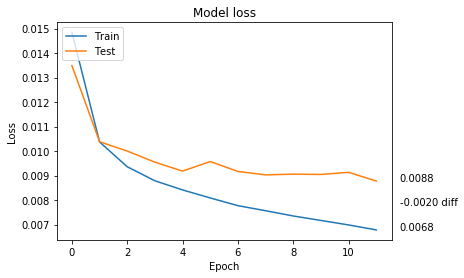

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.annotate('%0.4f' % history.history['loss'][-1], xy=(1, history.history['loss'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % history.history['val_loss'][-1], xy=(1, history.history['val_loss'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % (history.history['loss'][-1] - history.history['val_loss'][-1]) + " diff", xy=(1, (history.history['loss'][-1] + history.history['val_loss'][-1])/2), xytext=(8, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.show()

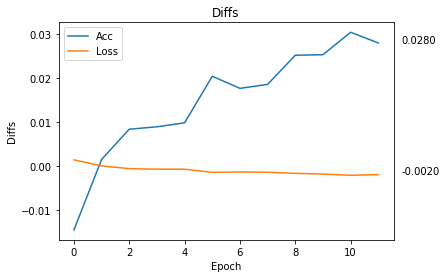

In [11]:
# Plot diff between training and validation for accuracy and loss
diff_acc = np.asarray(history.history['acc']) - np.asarray(history.history['val_acc'])
diff_loss = np.asarray(history.history['loss']) - np.asarray(history.history['val_loss'])
plt.plot(diff_acc)
plt.plot(diff_loss)
plt.title('Diffs')
plt.ylabel('Diffs')
plt.xlabel('Epoch')
plt.legend(['Acc', 'Loss'], loc='upper left')
plt.annotate('%0.4f' % diff_acc[-1], xy=(1, diff_acc[-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % diff_loss[-1], xy=(1, diff_loss[-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.show()

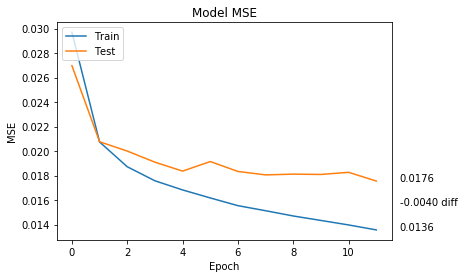

In [12]:
# Plot training & validation mse values
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.annotate('%0.4f' % history.history['mse'][-1], xy=(1, history.history['mse'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % history.history['val_mse'][-1], xy=(1, history.history['val_mse'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % (history.history['mse'][-1] - history.history['val_mse'][-1]) + " diff", xy=(1, (history.history['mse'][-1] + history.history['val_mse'][-1])/2), xytext=(8, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.show()

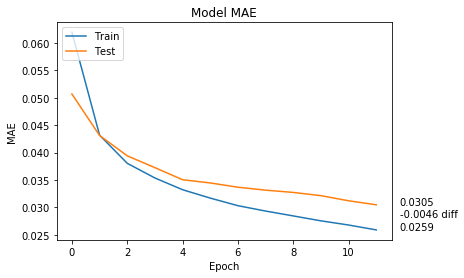

In [13]:
# Plot training & validation mae values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.annotate('%0.4f' % history.history['mae'][-1], xy=(1, history.history['mae'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % history.history['val_mae'][-1], xy=(1, history.history['val_mae'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % (history.history['mae'][-1] - history.history['val_mae'][-1]) + " diff", xy=(1, (history.history['mae'][-1] + history.history['val_mae'][-1])/2), xytext=(8, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.show()

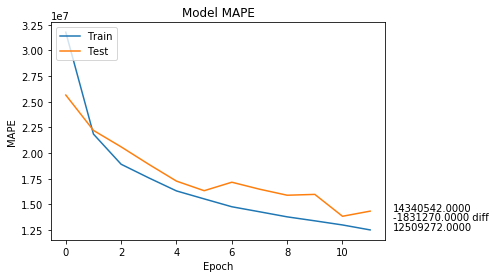

In [14]:
# Plot training & validation mape values
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.title('Model MAPE')
plt.ylabel('MAPE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.annotate('%0.4f' % history.history['mape'][-1], xy=(1, history.history['mape'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % history.history['val_mape'][-1], xy=(1, history.history['val_mape'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % (history.history['mape'][-1] - history.history['val_mape'][-1]) + " diff", xy=(1, (history.history['mape'][-1] + history.history['val_mape'][-1])/2), xytext=(8, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.show()

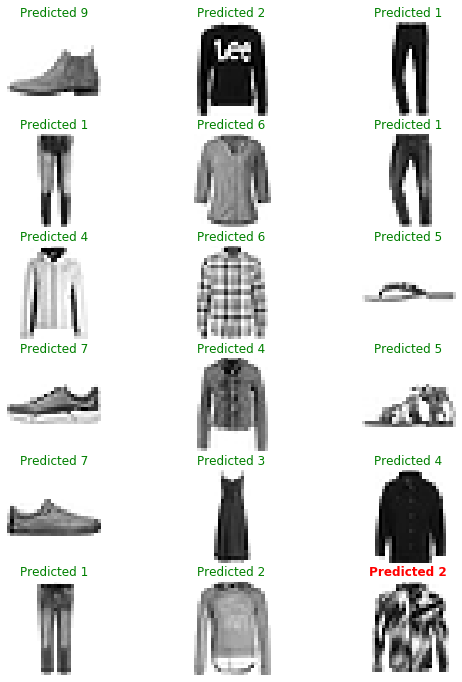

In [15]:
helpers.plot_predictions(model, test_images[:20], labels=test_vec_labels[:20])

In [17]:
from deeplearning2020 import Submission
Submission('3a850b62ce7875f05c1d5a3465803421', '2', model).submit()

Model wird validiert...
100% (200 of 200) |######################| Elapsed Time: 0:00:37 Time:  0:00:37
Assignment 2 erfolgreich abgegeben!
Dein Model hat eine Accuracy von 90.0% auf unseren Validierungsdaten.
Du erhältst 100.0% der Punkte auf dieses Assignment.
Falls du bereits eine Abgabe mit höherer Bewertung abgegeben hast, wird automatisch das bessere Ergebnis gewählt.
